In [3]:
#Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Step 2: Load the Iris Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target

In [8]:
#Step 3: Define Preprocessing Function
def preprocess(X, method):
    if method == 'none':
        return X
    elif method == 'standard':
        return StandardScaler().fit_transform(X)
    elif method == 'minmax':
        return MinMaxScaler().fit_transform(X)
    else:
        raise ValueError("Unknown preprocessing method")


In [9]:
#Step 4: Evaluation Function
def evaluate_clusters(X, labels):
    if len(set(labels)) <= 1 or len(set(labels)) >= len(X):
        return np.nan, np.nan, np.nan
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    return sil, ch, db

In [10]:
#Step 5: Define Clustering Algorithms
cluster_algorithms = {
    'KMeans': lambda n: KMeans(n_clusters=n, random_state=42),
    'Agglomerative': lambda n: AgglomerativeClustering(n_clusters=n),
    'DBSCAN': lambda _: DBSCAN(eps=0.5, min_samples=5)
}

In [11]:
#Step 6: Run Experiments
results = []
preprocess_methods = ['none', 'standard', 'minmax']

for prep in preprocess_methods:
    X_proc = preprocess(X, prep)
    for algo_name, algo_func in cluster_algorithms.items():
        for k in [2, 3, 4]:
            if algo_name == 'DBSCAN' and k != 3:
                continue  # DBSCAN doesn't use n_clusters
            model = algo_func(k)
            labels = model.fit_predict(X_proc)
            sil, ch, db = evaluate_clusters(X_proc, labels)
            results.append([prep, algo_name, k, sil, ch, db])

In [12]:
#Step 7: Display Results Table
df_results = pd.DataFrame(results, columns=[
    'Preprocessing', 'Algorithm', 'n_clusters',
    'Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'
])
df_results.sort_values(by='Silhouette Score', ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)

print("🔍 Top 5 Results by Silhouette Score:\n")
print(df_results.head())

🔍 Top 5 Results by Silhouette Score:

  Preprocessing      Algorithm  n_clusters  Silhouette Score  \
0          none  Agglomerative           2          0.686735   
1          none         KMeans           2          0.681046   
2        minmax         KMeans           2          0.630047   
3        minmax  Agglomerative           2          0.630047   
4      standard         KMeans           2          0.581750   

   Calinski-Harabasz  Davies-Bouldin  
0         502.821564        0.382753  
1         513.924546        0.404293  
2         354.365556        0.486167  
3         354.365556        0.486167  
4         251.349339        0.593313  


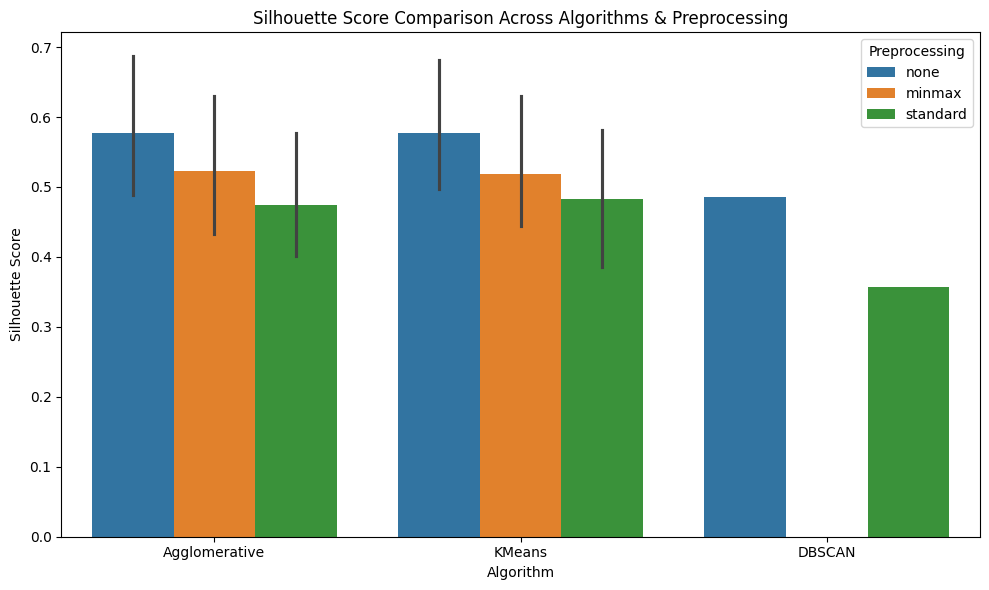

In [13]:
#Step 8: Visualization - Silhouette Score Comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Algorithm', y='Silhouette Score', hue='Preprocessing')
plt.title('Silhouette Score Comparison Across Algorithms & Preprocessing')
plt.legend(title='Preprocessing')
plt.tight_layout()
plt.show()

In [14]:
#Step 9: PCA for 2D Plotting
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=labels, palette='Set2')
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

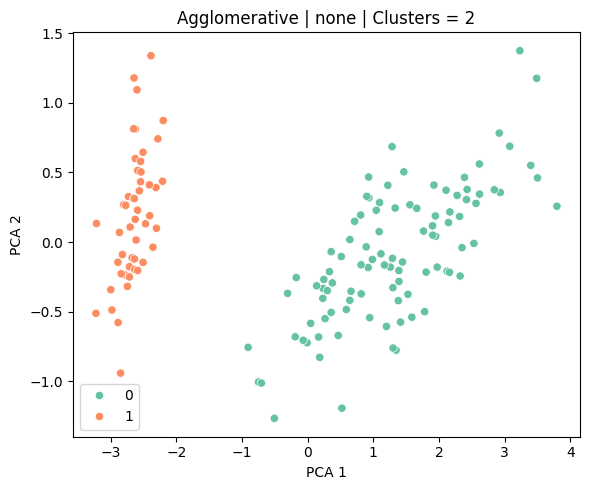

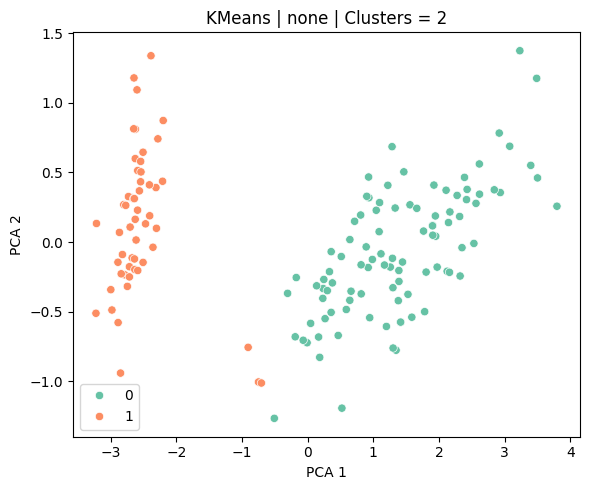

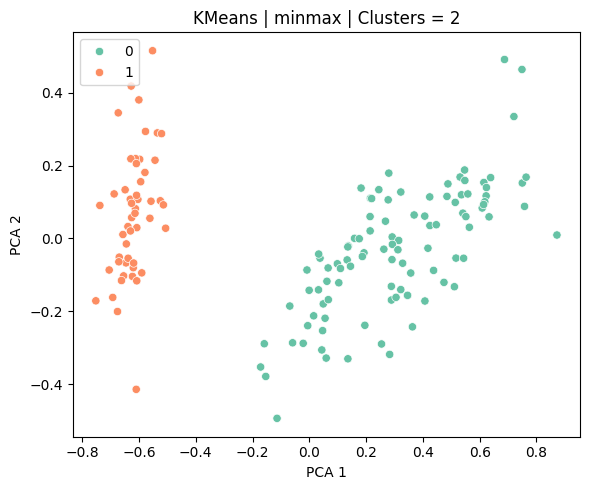

In [15]:
# ✅ Step 10: Visualize Top 3 Clusterings
top3 = df_results.head(3)
for _, row in top3.iterrows():
    prep = row['Preprocessing']
    algo = row['Algorithm']
    k = int(row['n_clusters'])
    X_proc = preprocess(X, prep)
    model = cluster_algorithms[algo](k)
    labels = model.fit_predict(X_proc)
    plot_clusters(X_proc, labels, f'{algo} | {prep} | Clusters = {k}')